 # **Proyección al año escolar 2028-2029 con Regresión Lineal**
 
## Objetivo: Proyectar la  matrícula estudiantil de la educación técnico profesional para los años 2023 al 2027.

Esto es un pronóstico propuesto basado en las informaciones que tenemos a la mano, palpables y concretas, con un enfoque de proyección basado en regresión lineal.

Se desconocen factores como próximas solicitudes de apertura de nuevos títulos o nuevas solicitudes de conversión de centros de la Modalidad Académica a la Educación Técnico Profesional, salvo en 4to grado del 2023, una potencial matrícula adicional de 1,426 estudiantes por la creación de 64 secciones nuevas.

En el año 2020-2021 se abrieron con cierta timidez algunas secciones en 4to grado debido a la pandemia. Otras secciones fueron siendo cerradas debido a la falta de maestros para impartir docencia. Esto no se evidencio inmediatamente debido a que se hizo una promoción general al final del año escolar 2019-2020.

Para realizar los análisis científicos y las visualizaciones de datos, se utilizaron las siguientes herramientas, programas, lenguajes y librerías:
Python, Anaconda, JupyterLab, Pandas, Matplotlib, Seaborn y scikit-learn.

Para la realización de este estudio, los años escolares se toma el año de inicio como año base.
Ejemplo:
2018-2019, año base 2018,
2019-2020, año base 2019,
etc.

 2 de septiembre 2023.
 Jimmy R. Coste Yost, Tecnología y Ciencia de datos.
 Dirección de Educación Téncico Profesional.
 Ministerio de Educación.
 República Dominicana.

### Paso 0. Importar librerias
Importar las bibliotecas necesarias, como pandas y scikit-learn.

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Paso 1. Obtención y Preparación de datos
Crear un DataFrame con los datos proporcionados de la matrícula por año, y añado los datos de proyección al modelo

In [6]:
data = {'Año base': [2018, 2019, 2020, 2021, 2022],
        'Matrícula': [71169, 84316, 91880, 89682, 89165]}
etpmatdf = pd.DataFrame(data)
etpmatdf

,Año base,Matrícula
0,2018,71169
1,2019,84316
2,2020,91880
3,2021,89682
4,2022,89165


### Paso 2 Analisis de datos para la Regresión lineal

Realizar un análisis exploratorio de datos para comprender mejor la tendencia de la matrícula en años anteriores.
Ajustar un modelo de regresión lineal a los datos históricos.
Utilizar el modelo ajustado para hacer la proyección para los años 2023 al 2027.

In [8]:
# Ajusta un modelo de regresión lineal:
X = etpmatdf['Año base'].values.reshape(-1, 1)
y = etpmatdf['Matrícula'].values

modelo_regresion = LinearRegression()
modelo_regresion.fit(X, y)

LinearRegression()

Proyecta la matrícula para los años 2023 al 2028 utilizando el modelo de regresión:

In [10]:
años_proyeccion = list(range(2023, 2029))
matricula_proyectada = modelo_regresion.predict([[año] for año in años_proyeccion])


Sumar 1,426 estudiantes potenciales que se añaden a la proyección del 2023

In [12]:
# Sumar la potencial matrícula de 1,426 estudiantes en 2023 a la proyección
matricula_proyectada[0] += 1426

Con esta modificación, la proyección para el año 2023 ahora incluye la potencial matrícula de 1,426 estudiantes sumada al valor proyectado por el modelo de regresión lineal. Esto aporta una proyección ajustada que refleja el aumento esperado de estudiantes en 2023.

Ahora creo un DataFrame con la proyección ajustada

In [15]:
proyeccion_df = pd.DataFrame({'Año base': años_proyeccion, 'Matrícula': matricula_proyectada})
proyeccion_df

,Año base,Matrícula
0,2023,99075.8
1,2024,101785.6
2,2025,105921.4
3,2026,110057.2
4,2027,114193.0
5,2028,118328.8


Me dispongo a crear un único DataFrame llamado datos_completos, que combina los datos históricos y la proyección. Luego, trazo ambos conjuntos de datos en el mismo gráfico de Seaborn.

In [17]:
# Unir los datos históricos con la proyección en un solo DataFrame
datos_completos = pd.concat([etpmatdf, proyeccion_df[proyeccion_df['Año base'] > 2022]], ignore_index=True)
datos_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Año base   11 non-null     int64  
 1   Matrícula  11 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 304.0 bytes


### Paso 3 Visualiza la proyección de la matrícula:

Este código utiliza Seaborn para crear un gráfico de línea con puntos para la proyección de matrícula y etiqueta los puntos con los valores correspondientes. 

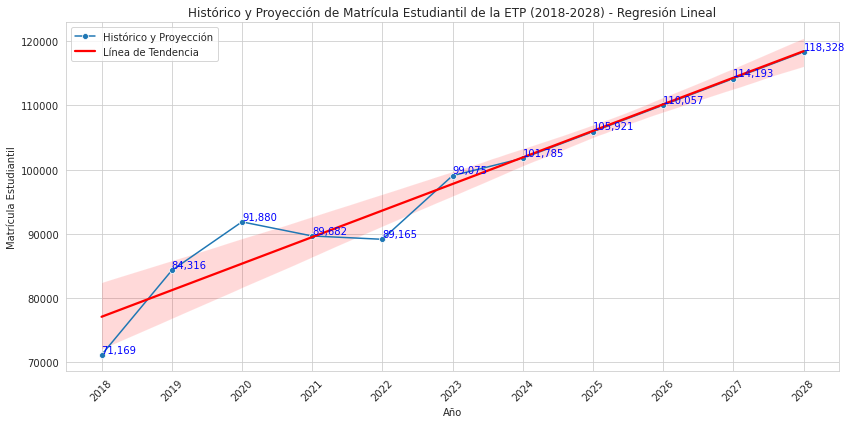

In [20]:
# Formatear los valores de Matrícula con separadores de miles en la tabla
pd.options.display.float_format = '{:,.0f}'.format
# Visualizar la matrícula histórica y proyectada con Seaborn
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
# Utilizar un gráfico de línea con puntos para la proyección y los años históricos
sns.lineplot(x='Año base', y='Matrícula', data=datos_completos, marker='o', label='Histórico y Proyección')
# Agregar etiquetas de valor en los puntos
for x, y in zip(datos_completos['Año base'], datos_completos['Matrícula']):
    plt.text(x, y, f'{int(y):,}', ha='left', va='bottom', fontsize=10, color='blue')
# Establecer el límite del eje X para mostrar años pares e impares
plt.xticks(datos_completos['Año base'], rotation=45)
# Añadir una línea de tendencia (regresión lineal)
sns.regplot(x='Año base', y='Matrícula', data=datos_completos, scatter=False, color='red', label='Línea de Tendencia')
plt.xlabel('Año')
plt.ylabel('Matrícula Estudiantil')
plt.title('Histórico y Proyección de Matrícula Estudiantil de la ETP (2018-2028) - Regresión Lineal')
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
datos_completos

,Año base,Matrícula
0,2018,"71,169"
1,2019,"84,316"
2,2020,"91,880"
3,2021,"89,682"
4,2022,"89,165"
5,2023,"99,076"
6,2024,"101,786"
7,2025,"105,921"
8,2026,"110,057"
9,2027,"114,193"


## Conclusiones

Segun se aprecia, se prevee un incremento gradual en la matrícula, tomando en cuenta las politicas de Fortalecimeinto y Mejoramiento de la Educación Técnico Profesional (ETP) de la actual gestión gubernamental.

Se aprecia como de 2018 a 2020 hubo un gran incremento por las políticas de expansión, pero este brusco crecimiento generó un efecto rebote negativo por varias razones:

- La pandemia del COVID-19 generó un detenimiento total en la posible variación positiva de la cantidad de secciones.
- La apertura de secciones e inclusión de nuevos títulos y conversiones masivas de centros entre el 2017-2020, sin nombramientos de maestros técnicos, equipamientos a los talleres, ni acompañamiento constante a estos nuevos equipos de gestión, generaron:

       - baja calidad de los aprendizajes en los estudiantes, 
       - problemas de liderazgo en la gestión de los centros educativos y 
       - una retardada adopción de la cultura de la Educación Técnico Profesional en estos.

Por lo que vemos como la matrícula fue descendiendo a la vez que fueron mermando la cantidad de secciones por grado en los centros de la ETP. Algunos, en centros que tenían poco de haber abierto estas secciones.

Esta regresión lineal podría sugerir un incremento similar en los años siguientes del 2023 al 2028, pero esta estadística presenta una probabilidad, que podría no concretarse, dado que las politicas actuales no son de expansión, sino de Fortalecimiento. 

Si es el caso que llegan a construirse nuevos politécnicos, con nombramiento de maestros técnicos por concurso, el equipamientos de los talleres y la debida orientación con el acompañamiento constante a estos nuevos equipos de gestión para fortalecer el liderazgo en los centros, alienados a la cultura de la ETP, es probable que estos numeros aumenten como sugiere la regresión lineal, pero con buenos niveles de calidad y pertinencia en lso aprendizajes de lso estudiantes.

## Sobre el estudio
Este enfoque utiliza la regresión lineal para encontrar una relación lineal entre el año y la matrícula estudiantil, y luego utiliza el modelo ajustado para proyectar la matrícula para los años futuros. Ten en cuenta que la elección del método de proyección depende de la naturaleza de los datos y las suposiciones subyacentes, por lo que es importante evaluar la idoneidad de cada método para tu conjunto de datos específico.

Para realizar los análisis científicos y las visualizaciones de datos en el ejemplo anterior, se utilizaron las siguientes herramientas, programas, lenguajes y librerías:

1. Python: Lenguaje de programación utilizado para realizar el análisis de datos y la visualización.
2. Anaconda: Una plataforma de distribución de Python que incluye un entorno de desarrollo integrado (IDE) llamado Anaconda Navigator. Anaconda simplifica la gestión de paquetes y entornos virtuales, lo que la hace muy popular en la comunidad de ciencia de datos.
3. JupyterLab: Un entorno de desarrollo interactivo que se utiliza comúnmente para análisis de datos y programación en Python. Permite la ejecución interactiva de celdas de código.
4. Pandas: Una librería de Python para el análisis y manipulación de datos. Se usa para cargar y manipular datos tabulares, como DataFrames.
5. Matplotlib: Una librería de visualización de datos en Python. Se utilizó para crear gráficos de líneas que representan los datos históricos y la proyección.
6. Seaborn: Otra librería de visualización de datos en Python que se usa para crear gráficos más estilizados y personalizables. En el ejemplo, se empleó Seaborn para mostrar los datos históricos y la proyección de manera más atractiva.
7. scikit-learn: Una librería de Python para el aprendizaje automático y el análisis de datos. En el ejemplo, se utilizó para ajustar un modelo de regresión lineal a los datos históricos y realizar proyecciones basadas en ese modelo.


### Científico de datos:
Jimmy R. Coste Yost. Tecnología y Ciencia de datos, para la Dirección de Educación Técnico Profesional. Nivel Secundario. Ministerio de educación de la República Dominicana.
jimmy.coste@minerd.gob.do

2 de Septiembre 2023.